In [2]:
# IMPORT LIBRARY
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime

# baca file dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#ubah pathnya sesuai lokasi dataset 
dataset=pd.read_csv('/content/drive/MyDrive/covid_impact_on_airport_traffic.csv',index_col="Date",parse_dates=True)


In [4]:
# melihat isi dataset
dataset.head()

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
Date,,,,,,,,,,
2020-04-03,Daily,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-04-13,Daily,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-07-10,Daily,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-09-02,Daily,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2020-10-31,Daily,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [5]:
# melihat sebaran per negara
data_per_negara = dataset.groupby("Country").count()
data_per_negara

,AggregationMethod,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Geography
Country,,,,,,,,,
Australia,257,257,257,257,257,257,257,257,257
Canada,2311,2311,2311,2311,2311,2311,2311,2311,2311
Chile,238,238,238,238,238,238,238,238,238
United States of America (the),4441,4441,4441,4441,4441,4441,4441,4441,4441


In [10]:
# Feature selection -> mengambil data yang dibutuhkan
data = dataset.drop(['AggregationMethod', 'Version', 'ISO_3166_2', 'Geography', 'Centroid', 'State', 'AirportName', 'City'], 
                         axis=1)
data = data.sort_values(by="Date")
data.head()


,PercentOfBaseline,Country
Date,,
2020-03-16,96,Chile
2020-03-16,72,Canada
2020-03-16,92,United States of America (the)
2020-03-16,98,United States of America (the)
2020-03-16,68,United States of America (the)


In [12]:
#melihat summary dari dataset
data.describe()

,PercentOfBaseline
count,7247.000000
mean,66.651442
std,22.134433
min,0.000000
25%,53.000000
50%,67.000000
75%,84.000000
max,100.000000


In [16]:
# membuat dataframe per negara
data_per_negara = data.groupby('Country')
australia = data_per_negara.get_group('Australia')
canada = data_per_negara.get_group('Canada')
chile = data_per_negara.get_group('Chile')
us  = data_per_negara.get_group('United States of America (the)')



,PercentOfBaseline,Country
Date,,
2020-03-16,92,Australia
2020-03-17,90,Australia
2020-03-18,97,Australia
2020-03-19,89,Australia
2020-03-20,85,Australia
...,...,...
2020-11-28,46,Australia
2020-11-29,28,Australia
2020-11-30,29,Australia


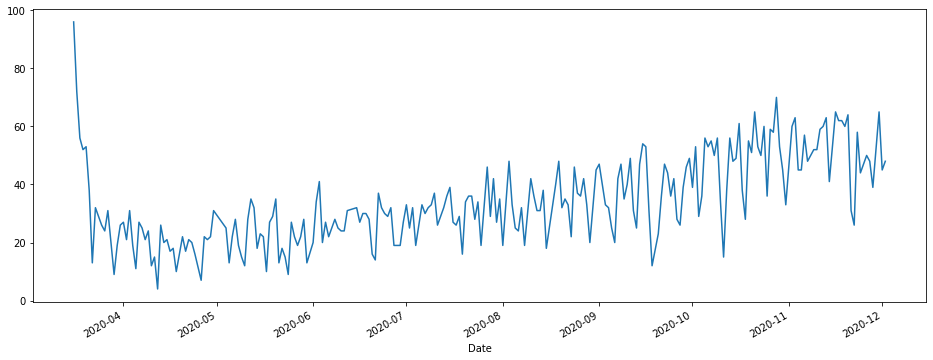

In [17]:
chile['PercentOfBaseline'].plot(figsize=(16,6))